In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [2]:
column_names = ['ID', 'entity', 'sentiment', 'comment']
twitter = pd.read_csv('twitter_training.csv', header=None, names=column_names)


In [3]:


twitter.shape

(74682, 4)

In [4]:

# Count of unique entities
game_counts = twitter['entity'].value_counts()
print(game_counts)

entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

In [5]:

twitter.head(10)

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [6]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   comment    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
duplicates = twitter.duplicated()
duplicated_rows = twitter[duplicates]
duplicated_rows.count()
     

ID           2700
entity       2700
sentiment    2700
comment      2340
dtype: int64

In [8]:
twitter.drop_duplicates(inplace=True)

In [9]:
duplicates = twitter.duplicated()
duplicated_rows = twitter[duplicates]
duplicated_rows.count()

ID           0
entity       0
sentiment    0
comment      0
dtype: int64

In [10]:
twitter.isnull().sum()

ID             0
entity         0
sentiment      0
comment      326
dtype: int64

In [11]:
twitter = twitter.dropna()

In [12]:
twitter.isnull().sum()

ID           0
entity       0
sentiment    0
comment      0
dtype: int64

In [13]:
twitter.nunique()
     

ID           12447
entity          32
sentiment        4
comment      69491
dtype: int64

In [14]:
for i in range(5):
    print(f"{i+1}: {twitter['comment'][i]}   ->   {twitter['sentiment'][i]}")
     

1: im getting on borderlands and i will murder you all ,   ->   Positive
2: I am coming to the borders and I will kill you all,   ->   Positive
3: im getting on borderlands and i will kill you all,   ->   Positive
4: im coming on borderlands and i will murder you all,   ->   Positive
5: im getting on borderlands 2 and i will murder you me all,   ->   Positive


In [15]:
# SENTIMENT ANALYSIS 

twitter['sentiment'].value_counts()
     

sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

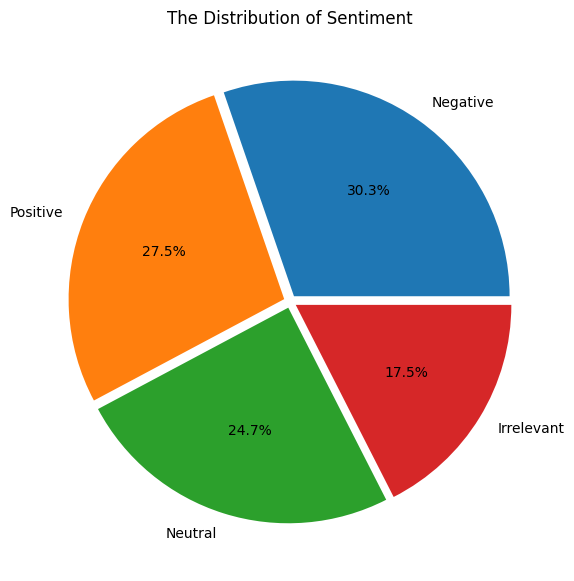

In [16]:
plt.figure(figsize=(10,7))
plt.pie(x=twitter['sentiment'].value_counts().values, labels=twitter['sentiment'].value_counts().index, autopct='%.1f%%', explode=[0.03, 0.03,0.03,0.03])
plt.title('The Distribution of Sentiment')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1664\2841243531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=twitter, palette='Set2')


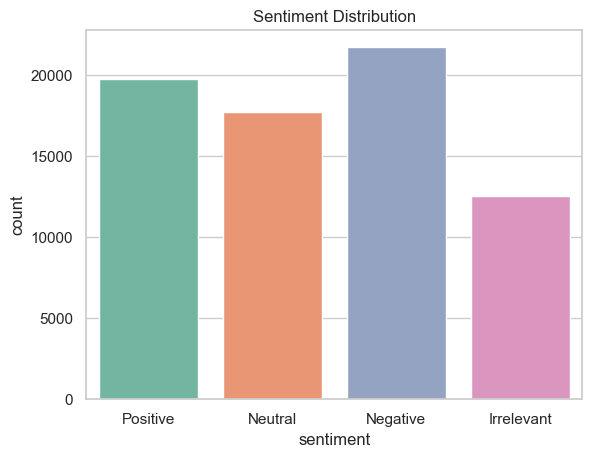

In [17]:
sns.set(style='whitegrid') 


sns.countplot(x='sentiment', data=twitter, palette='Set2')
plt.title('Sentiment Distribution')
plt.show()

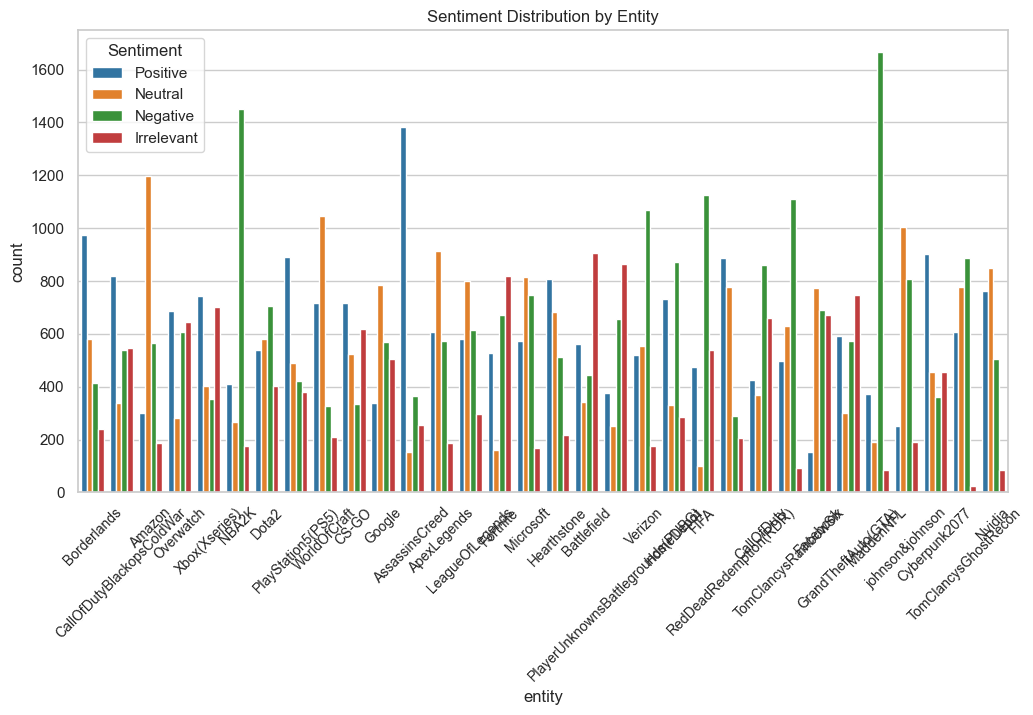

In [18]:
sns.set(style='whitegrid')  

dark_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 
plt.figure(figsize=(12, 6))
sns.countplot(x='entity', hue='sentiment', data=twitter, palette=dark_colors)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=45, fontsize=10)  
plt.legend(title='Sentiment')  
plt.show()

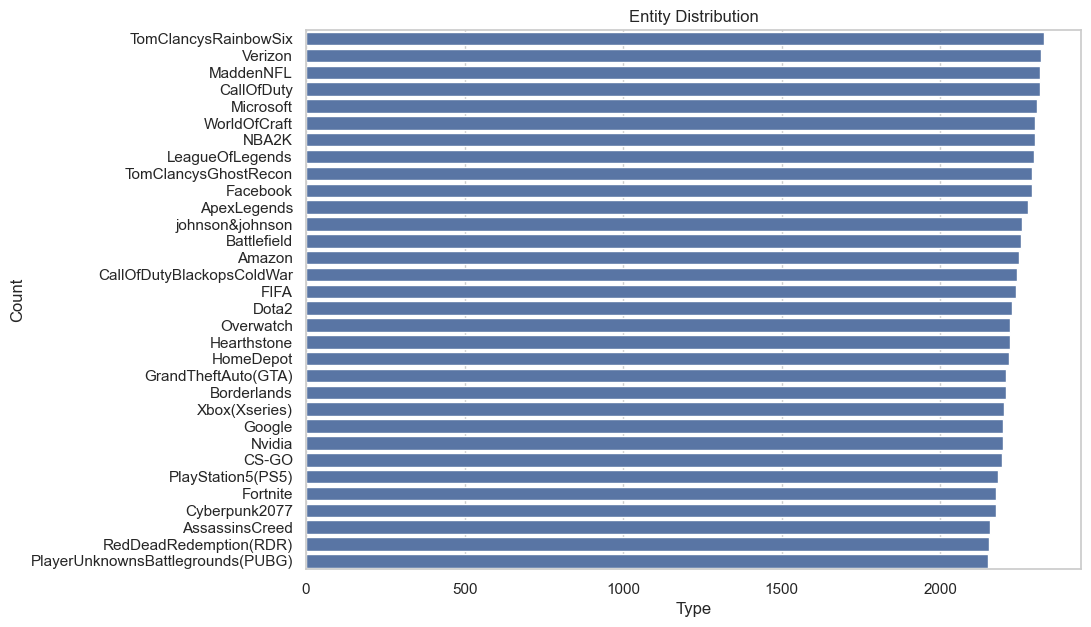

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(x=twitter['entity'].value_counts().values,y=twitter['entity'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Entity Distribution')
plt.show()

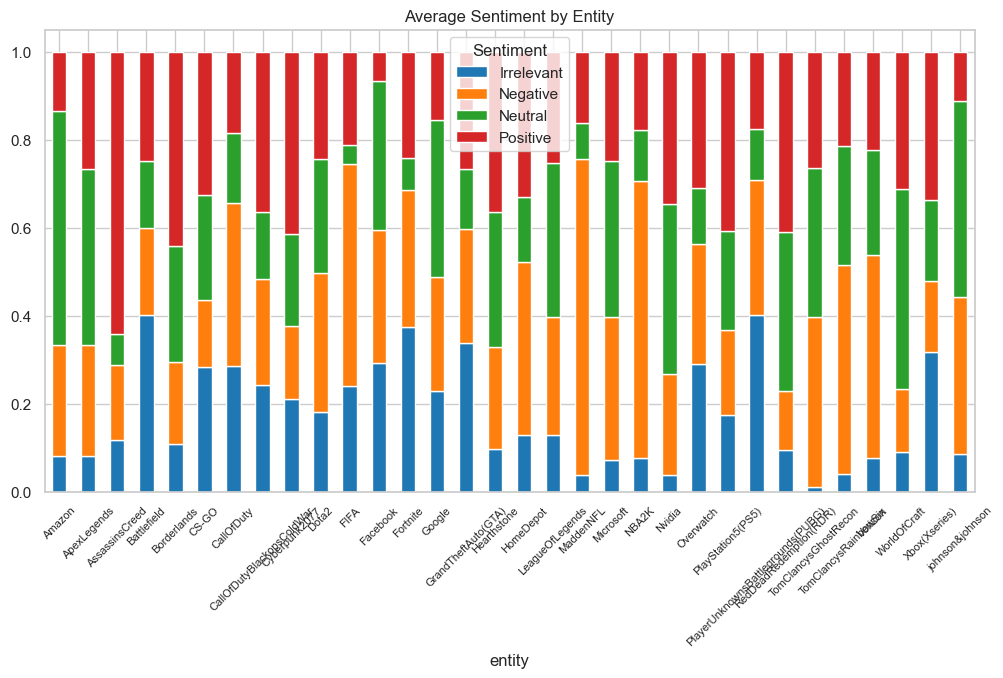

In [20]:
average_sentiment_by_entity = twitter.groupby('entity')['sentiment'].value_counts(normalize=True).unstack()

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

average_sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(12, 6), color=custom_colors)
plt.title('Average Sentiment by Entity')
plt.xticks(rotation=45, fontsize=8)
plt.legend(title='Sentiment')
plt.show()

In [21]:
#  W O R D      C L O U D

In [22]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def clean(text):
    text = str(text).lower()
    text = re.sub('.*?', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
     

In [24]:
twitter.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [25]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(width=800,height=500,min_font_size=10,background_color='white')
     

In [26]:
#Positive Sentiment Word Cloud:


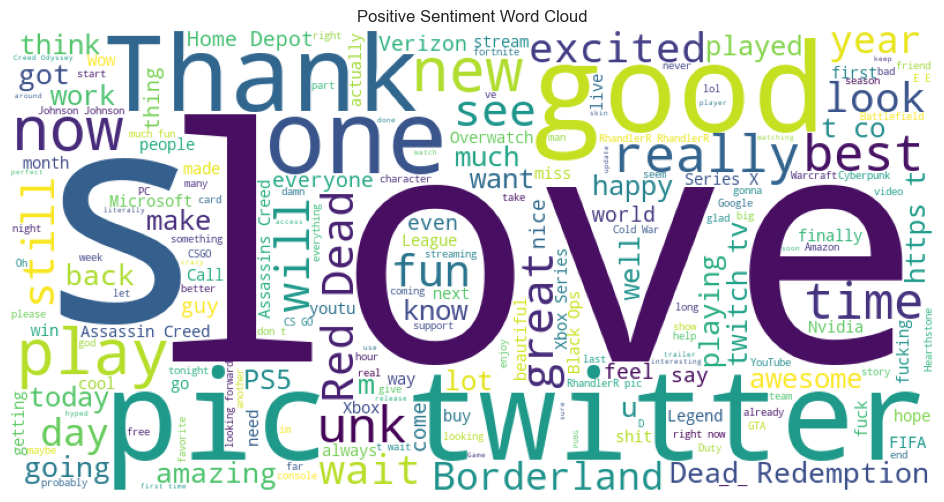

In [27]:
positive_data = twitter[twitter['sentiment'] == 'Positive']['comment'].str.cat(sep=" ")

# Exclude the word "game" from the text data
positive_data = positive_data.replace("game", "")
if positive_data:
    wc = WordCloud(width=800, height=400, background_color='white').generate(positive_data)
    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")

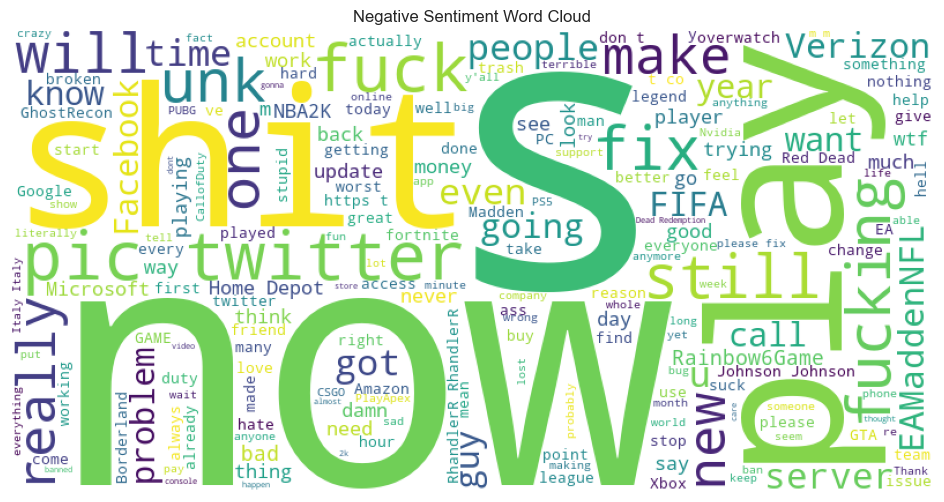

In [28]:
negative_data = twitter[twitter['sentiment'] == 'Negative']['comment'].str.cat(sep=" ")

negative_data = negative_data.replace("game", "")

if negative_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(negative_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")


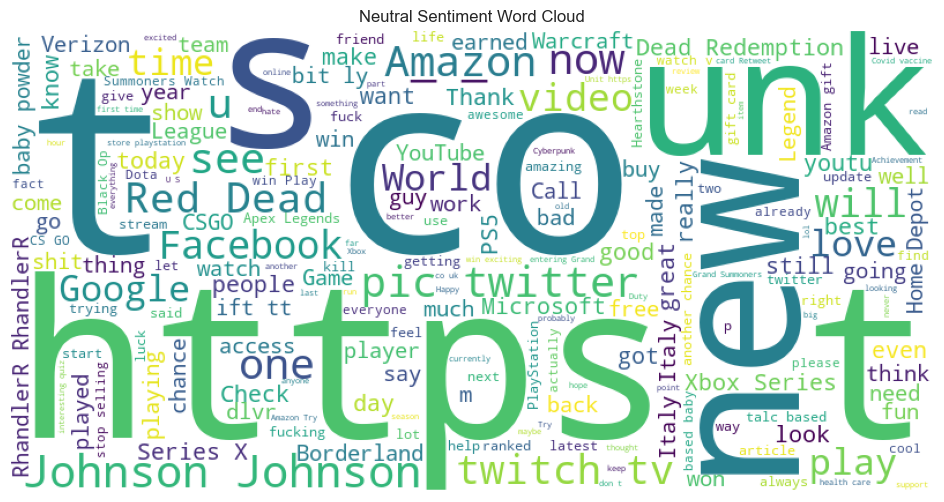

In [29]:
neutral_data = twitter[twitter['sentiment'] == 'Neutral']['comment'].str.cat(sep=" ")

neutral_data = neutral_data.replace("game", "")

if neutral_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(neutral_data)
    plt.figure(figsize=(12, 6))
    plt.title('Neutral Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for neutral sentiment.")

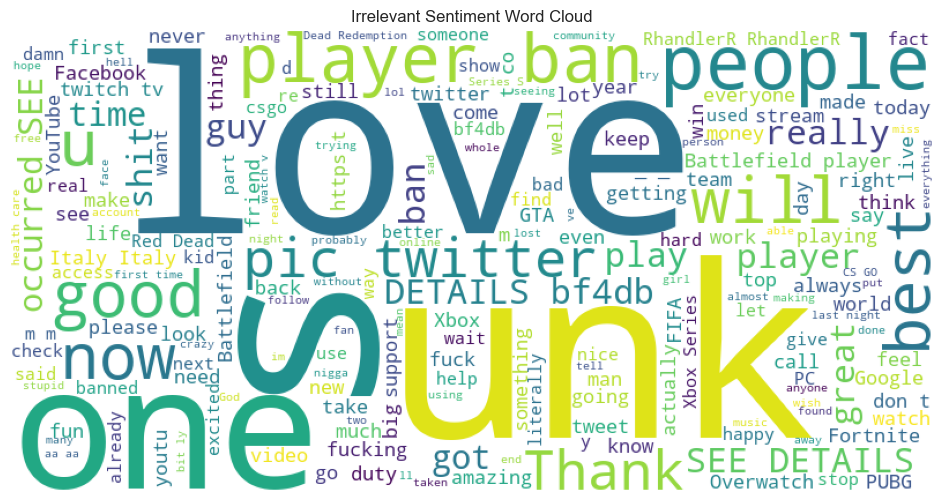

In [30]:
irrelevant_data = twitter[twitter['sentiment'] == 'Irrelevant']['comment'].str.cat(sep=" ")

irrelevant_data = irrelevant_data.replace("game", "")

if irrelevant_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(irrelevant_data)
    plt.figure(figsize=(12, 6))
    plt.title('Irrelevant Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for irrelevant sentiment.")